# <p style="background: linear-gradient(to right,#660708, #161a1d); color:white; font-size:250%; text-align:Center; border-radius: 20px 100px;"> ML - NLP- Mañaneras </p>

## <p style="background-color:#660708; color:white; font-family:newtimeroman; font-size:150%; text-align:left; border-radius: 10px 10px;"> ⚪ Librerias </p>

In [1]:
import string

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from unidecode import unidecode

In [2]:
## Descargar la informacion necesaria para el pre-procesamiento 

# nltk.download('stopwords')

# Esto se puede hacer una vez nada mas, dejare comentada la linea para no descargarlo nuevamente

## <p style="background-color:#660708; color:white; font-family:newtimeroman; font-size:150%; text-align:left; border-radius: 10px 10px;"> ⚪ Explorando el dataset </p>

In [3]:
# Cargar los datos - Repositorio remoto
# dialog = pd.read_csv('https://raw.githubusercontent.com/GilbertoNavaMarcos/machine-learningv1/main/data/dialogos.csv', index_col=0)

# Cargar los datos - Repositorio local
dialog = pd.read_csv('data/dialogos.csv', index_col=0)

dialog['speaker'] = np.where(dialog['speaker'] == 'amlo', 'politico', 'medico')
dialog.head() 

,speaker,dialog,length
0,politico,"Amigas, amigos, paisanas, paisanos de Palenque:",47
1,politico,Me da mucho gusto estar de nuevo en trabajos d...,91
2,politico,"Antes de entrar en materia, quiero enviar un s...",471
3,politico,Di la instrucción de que se mantengan trabajan...,338
4,politico,"Quiero decirles a mis paisanos que padecen, qu...",113


In [4]:
dialog.sample(3)

,speaker,dialog,length
89484,politico,Ya también se está atendiendo a los jóvenes qu...,363
117561,politico,De modo que la Cuarta Transformación en Chiapa...,231
24168,medico,Por supuesto.,13


> Clasificacion binaria

**Metrica de eleccion: Accuracy**

## <p style="background-color:#660708; color:white; font-family:newtimeroman; font-size:150%; text-align:left; border-radius: 10px 10px;"> 🔎 Analisis Exporatorio de Datos - _EDA_ </p>

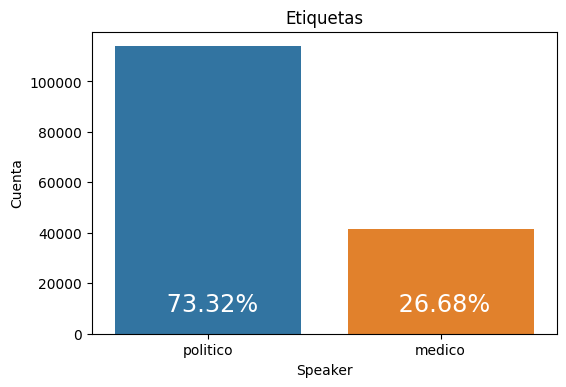

In [5]:
fig = plt.figure(dpi = 100)
ax = fig.gca()

sns.countplot(x='speaker', data=dialog, ax=ax)
ax.set_title('Etiquetas')
ax.set_xlabel('Speaker')
ax.set_ylabel('Cuenta')

percentages = (dialog['speaker'].value_counts() /len(dialog)).to_dict()
xs = {label.get_text(): idx for idx, label in enumerate (ax.get_xticklabels())}

for label, pct in percentages.items():
    ax.text(xs[label], 9_000, f'{pct: 0.2%}', ha='center', fontsize='xx-large', c='white')
    pass

<AxesSubplot:xlabel='length', ylabel='speaker'>

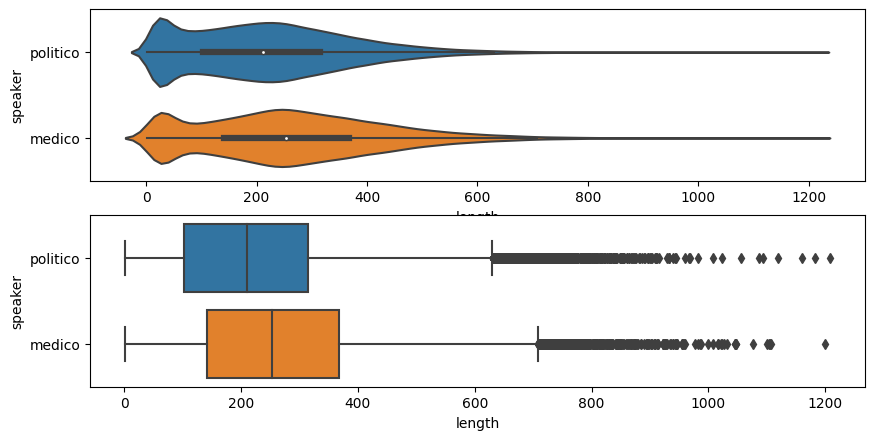

In [6]:
fig, (ax1, ax2) = plt.subplots(2, 1, dpi=100, figsize=(10, 5))

sns.violinplot(y='speaker', x = 'length', data=dialog, ax=ax1)
sns.boxplot(y='speaker', x = 'length', data=dialog, ax=ax2)

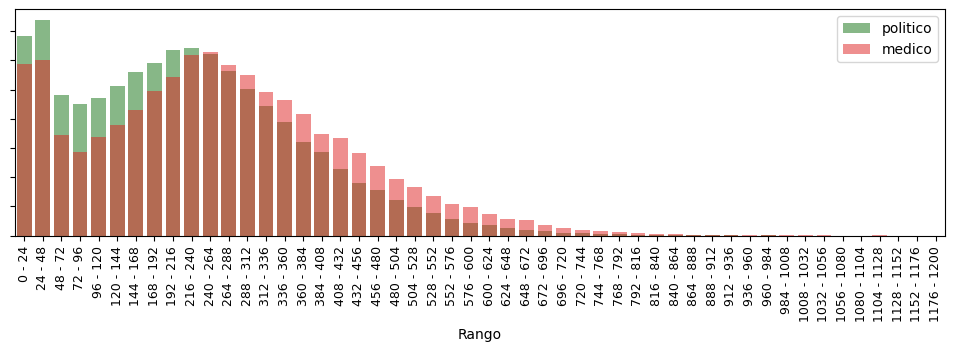

In [7]:
fig = plt.figure(dpi=100, figsize=(12,3))
ax = fig.gca()

for label, color in [('politico', 'green'), ('medico', 'red')]:
    lengths = dialog[dialog['speaker'] == label]
    values, bins = np.histogram(lengths['length'], range=(0, 1_200), bins=50)
    y = (bins[1:] + bins[:-1]) / 2
    sns.barplot(x=y, y=values/ len(lengths), label=label, color=color, ax=ax, alpha=0.5)

ax.set_xticklabels([f'{int(_y)} - {int(_x)}' for _x,_y in zip(bins[1:], bins[:-1])], rotation=90, fontsize=9)
ax.set_yticklabels([])
ax.set_xlabel('Rango')
ax.legend()

## <p style="background-color:#660708; color:white; font-family:newtimeroman; font-size:150%; text-align:left; border-radius: 10px 10px;"> 🪓 Dividir el dataset </p>

Entrenamiento y pruebas

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
rest, test = train_test_split(dialog, test_size=0.2, random_state=42, stratify=dialog['speaker'])

In [10]:
train, val = train_test_split(rest, test_size=0.2, random_state=42, stratify=rest['speaker'])

In [11]:
len(train), len(val), len(test)

(99524, 24881, 31102)

In [12]:
dialog_train = train['dialog']
dialog_val = val['dialog']
dialog_test = test['dialog']

target_train = train['speaker']
target_val = val['speaker']
target_test = test['speaker']

In [13]:
dialog_train

145650                                                  No.
12409     Sí, bastante, bastante, y es un compromiso que...
50184     Es lamentable, tengo que andar cuidando lo que...
148809    Pero afortunadamente hubo muy buen cálculo de ...
58062     Si yo me pongo un cubrebocas de estos convenci...
                                ...                        
92212     ¡Que viva el gobernador de Puebla, Miguel Barb...
10443     Nos queda el avión, que se va a vender también...
74139     Y vamos a informar sobre el programa Tandas pa...
78989     Ahora se va a constituir el comité de padres d...
145772    En fin, nuestro compromiso es escuchar, atende...
Name: dialog, Length: 99524, dtype: object

In [14]:
target_train

145650    politico
12409     politico
50184     politico
148809      medico
58062       medico
            ...   
92212     politico
10443     politico
74139     politico
78989     politico
145772    politico
Name: speaker, Length: 99524, dtype: object